In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
def model_metrics(pipe, x_train, y_train, x_test, y_test, 
                       model_name='Regression Model', ):
  ## Train
  mae = mean_absolute_error(y_train, pipe.predict(x_train))
  mse = mean_squared_error(y_train, pipe.predict(x_train))
  rmse = np.sqrt(mean_squared_error(y_train, pipe.predict(x_train)))
  r2 = r2_score(y_train, pipe.predict(x_train))
  print(f'{model_name} Train Scores')
  print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:.4f}\n')

  ## Test
  mae = mean_absolute_error(y_test, pipe.predict(x_test))
  mse = mean_squared_error(y_test, pipe.predict(x_test))
  rmse = np.sqrt(mean_squared_error(y_test, pipe.predict(x_test)))
  r2 = r2_score(y_test, pipe.predict(x_test))

  # Display the metrics for the model
  print(f'{model_name} Test Scores')
  print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:.4f}\n')

## read in the Data/student/student-mat.csv (it uses ";" as the sep)
df = pd.read_csv('Data/student/student-mat.csv',sep =';')
# display info and .head
df.info()
df.head()

In [8]:
## read in the Data/student/student-mat.csv (it uses ";" as the sep)
Sales_P= pd.read_csv(f'Data/sales_predictions_2023.csv',sep =';')
Sales_P.head()

,"Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales"
0,"FDA15,9.3,Low Fat,0.016047301,Dairy,249.8092,O..."
1,"DRC01,5.92,Regular,0.019278216,Soft Drinks,48...."
2,"FDN15,17.5,Low Fat,0.016760075,Meat,141.618,OU..."
3,"FDX07,19.2,Regular,0,Fruits and Vegetables,182..."
4,"NCD19,8.93,Low Fat,0,Household,53.8614,OUT013,..."


In [9]:
Sales_P.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                      Non-Null Count  Dtype 
---  ------                                                                                                                                                                                      --------------  ----- 
 0   Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales  8523 non-null   object
dtypes: object(1)
memory usage: 66.7+ KB


In [10]:
#No duplicate data to drop
Sales_P.duplicated().sum()

0

In [11]:
Sales_P.isna().sum()

Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales    0
dtype: int64

In [12]:
# Replaced the Ordinal features
Sales_P['Item_Fat_Content'].value_counts()

KeyError: 'Item_Fat_Content'

In [13]:
replacement_dictionary= {'Low Fat':0,'LF':0,'low fat':0,'Regular':1,'reg':1}
Sales_P['Item_Fat_Content'].replace(replacement_dictionary, inplace= True)
Sales_P['Item_Fat_Content']

KeyError: 'Item_Fat_Content'

In [10]:
Sales_P['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

I droped the column because it would produce a really long one hot encoder and I was told to do so by the assingment.

In [11]:
del Sales_P['Item_Identifier']
del Sales_P['Outlet_Identifier']

In [12]:
Sales_P.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.352693,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.477836,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.000000,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,1.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,1.000000,0.328391,266.888400,2009.000000,13086.964800


#Part 3

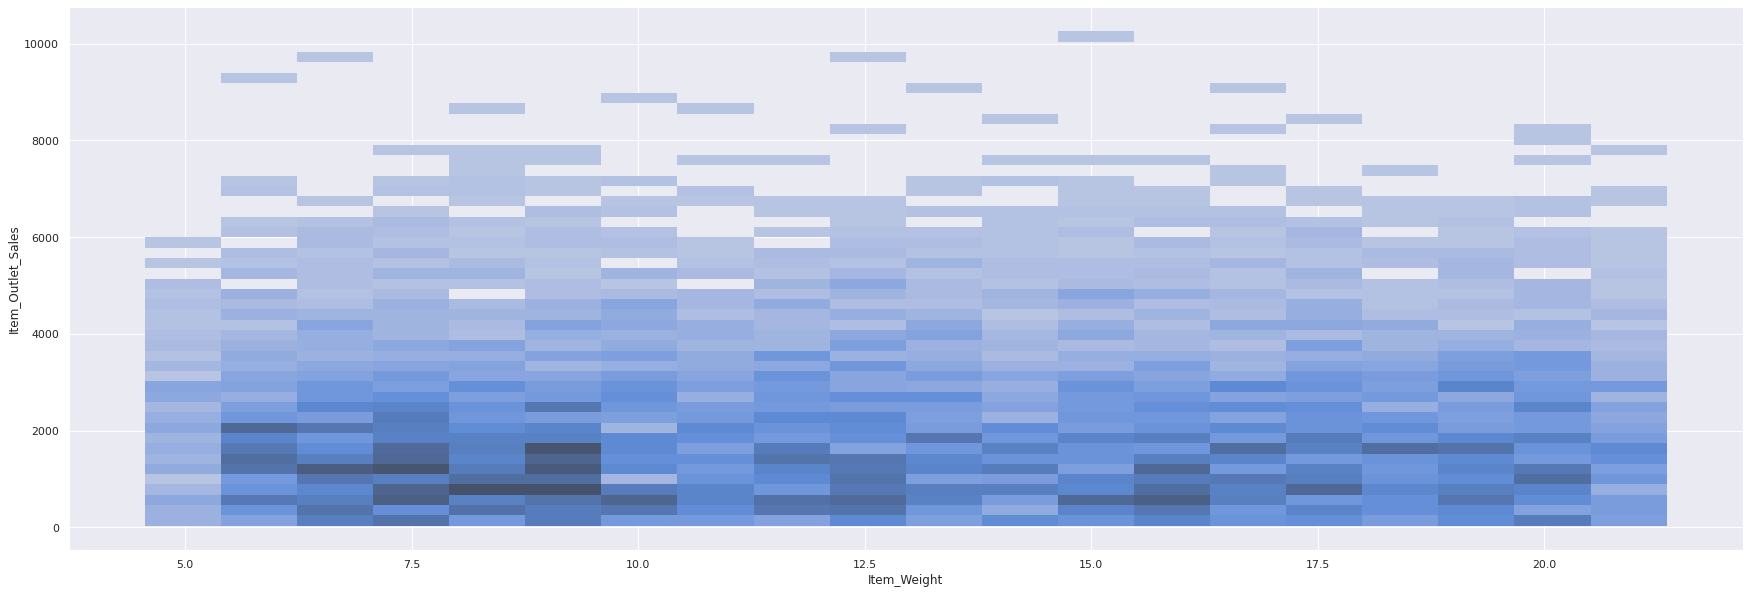

In [13]:
sns.set(rc={'figure.figsize':(30,10)})
sns.histplot(data=Sales_P,x='Item_Weight',y='Item_Outlet_Sales')
plt.show()

Boxplot to view statistical summaries of various features in your dataset.

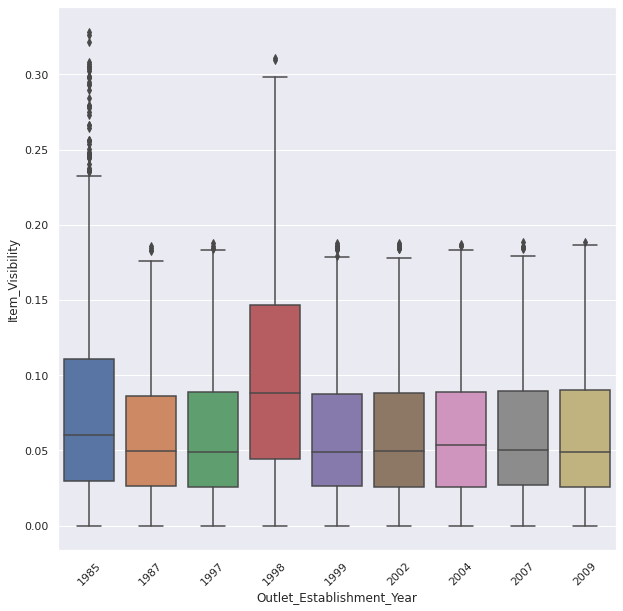

In [14]:
sns.set(rc={'figure.figsize':(10,10)})
plt.xticks(rotation=45)
sns.boxplot(data=Sales_P, x='Outlet_Establishment_Year', y= 'Item_Visibility')  
plt.show()

Heatmap of the correlation between features.

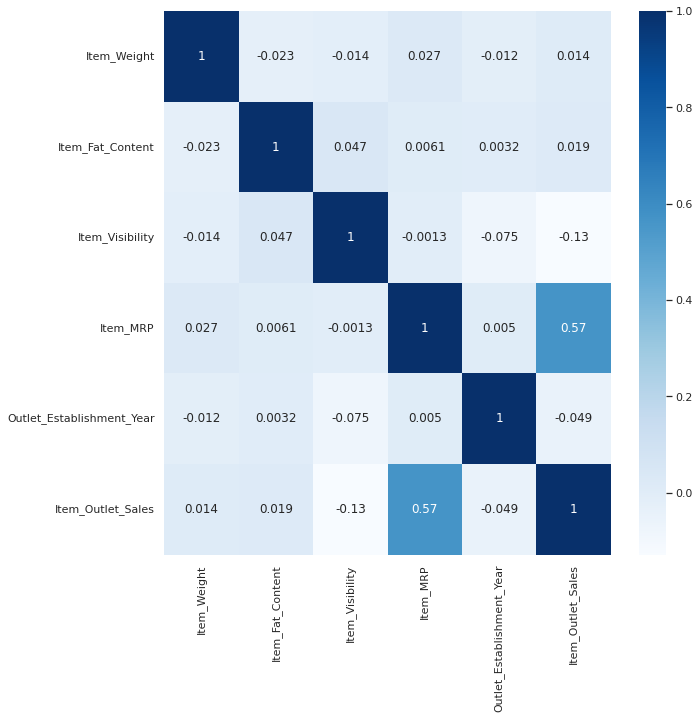

In [15]:
sns.heatmap(Sales_P.corr(),annot=True,cmap='Blues');


# Part 4 Core

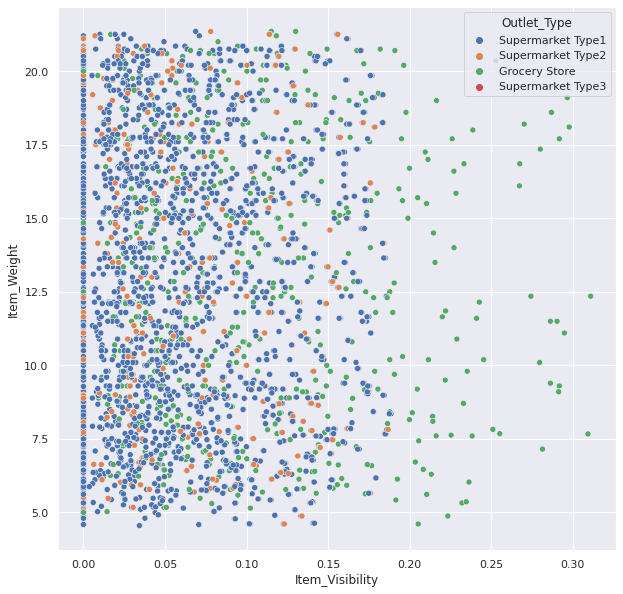

In [16]:
sns.scatterplot(data= Sales_P, x='Item_Visibility', y='Item_Weight', hue= 'Outlet_Type');
# this scatterplot show that the visibility is very importtant in Grocery stores.

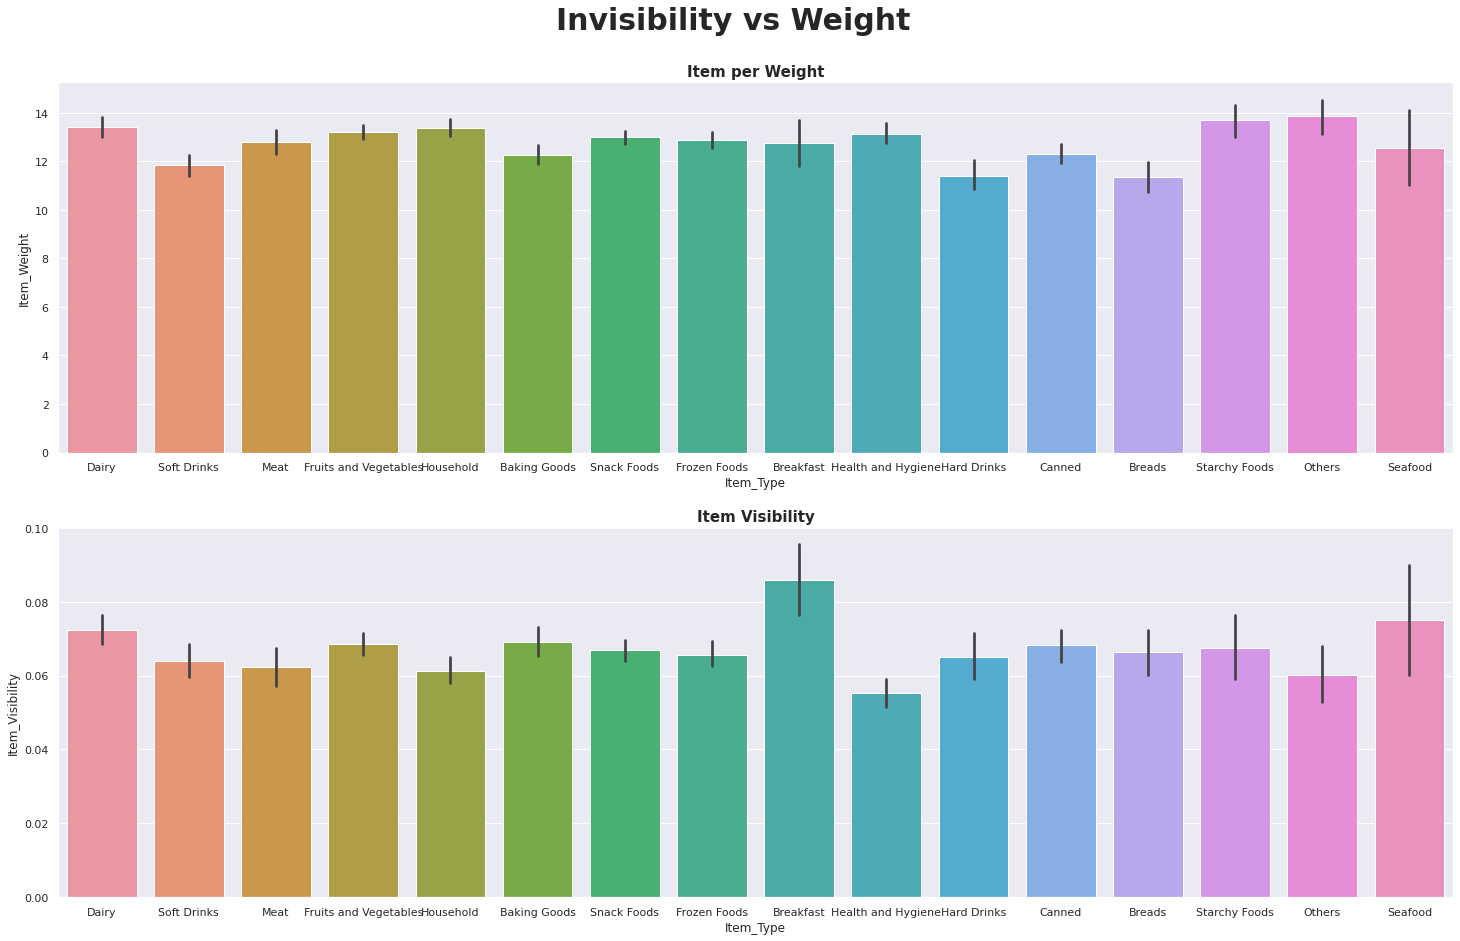

In [17]:
fig, axes = plt.subplots(nrows = 2, figsize = (25,15))

sns.barplot(data = Sales_P, x = 'Item_Type', y= 'Item_Weight', ax = axes[0])
axes[0].set_title('Item per Weight', fontsize = 15, fontweight = 'bold')


sns.barplot(data = Sales_P, x = 'Item_Type', y = 'Item_Visibility', ax = axes[1])
axes[1].set_title('Item Visibility', fontsize = 15, fontweight = 'bold')


fig.suptitle('Invisibility vs Weight', fontsize = 30, fontweight = 'bold', y = .95);

# I was trying to find a correlation between the wight and the visibility of an item but I don't see much difference between both bar graphs beneath.

# Project 1 Part 5
Identify the features (X) and target (y)

In [18]:
# Identified the X and Y made the split
X= Sales_P.drop('Item_Outlet_Sales', axis=1)
y= Sales_P['Item_Outlet_Sales']

#split performed
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42) 

In [19]:
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

In [20]:
cat_selector(X_train)

['Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

In [21]:
scaler = StandardScaler()
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [22]:
constant_imputer = SimpleImputer(strategy='constant', fill_value='missing')
mean_imputer = SimpleImputer(strategy='mean')

Started the pipeline and transformer at the end

In [23]:
numeric_pipe = make_pipeline(mean_imputer, scaler)
cat_pipe = make_pipeline(constant_imputer, ohe)

In [24]:
number_tuple = (numeric_pipe, num_selector)
category_tuple = (cat_pipe, cat_selector)

In [25]:
preprocessor = make_column_transformer(number_tuple, category_tuple, remainder= 'drop')
preprocessor.fit(X_train, y_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f14778cfa90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f14776763a0>)])

In [26]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [27]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f14778cfa90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f14776763a0>)])

In [28]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed[:5]

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 32)




array([[ 0.81724868, -0.7403206 , -0.71277507,  1.82810922,  1.32784893,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 ,  1.35076614, -1.29105225,  0.60336888,  1.32784893,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.35076614,  1.81331864,  0.2445

#linear Regression

In [29]:
reg = LinearRegression()
reg_pipe = make_pipeline(preprocessor, reg)
reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f14778cfa90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f14776763a0>)])),
                ('linearregression', LinearRegression())])

In [30]:
model_metrics(reg_pipe, X_train, y_train, X_test, y_test, model_name='Linear Regression Model')

Linear Regression Model Train Scores
MAE: 847.1289 
MSE: 1,297,558.1364 
RMSE: 1,139.1041 
R2: 0.5616

Linear Regression Model Test Scores
MAE: 804.1204 
MSE: 1,194,349.7154 
RMSE: 1,092.8631 
R2: 0.5671



In [31]:
train_score = reg_pipe.score(X_train, y_train)
test_score = reg_pipe.score(X_test, y_test)
print(train_score)
print(test_score)

0.5615551419174629
0.5671041872384911


#Decision Tree

In [32]:
reg_tree = DecisionTreeRegressor(random_state= 42)
dec_pipe = make_pipeline(preprocessor, reg_tree)
dec_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f14778cfa90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f14776763a0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [33]:
train_preds = dec_pipe.predict(X_train)
test_preds = dec_pipe.predict(X_test)

In [34]:
depths = range(1, dec_pipe['decisiontreeregressor'].get_depth())

#create a dataframe to store train and test scores.
scores = pd.DataFrame(columns=['Train', 'Test'], index=depths)

#loop over the values in depths
for n in depths:
  #fit a new model with max_depth
  tree = DecisionTreeRegressor(random_state = 42, max_depth=n)

  #put the model into a pipeline
  tree_pipe = make_pipeline(preprocessor, tree)
  
  #fit the model
  tree_pipe.fit(X_train, y_train)
  
  #create prediction arrays
  train_pred = tree_pipe.predict(X_train)
  test_pred = tree_pipe.predict(X_test)
  
  #evaluate the model using R2 Score
  train_r2score = r2_score(y_train, train_pred)
  test_r2score = r2_score(y_test, test_pred)
  
  #store the scores in the scores dataframe
  scores.loc[n, 'Train'] = train_r2score
  scores.loc[n, 'Test'] = test_r2score

In [35]:
scores

,Train,Test
1,0.237797,0.229683
2,0.431641,0.433778
3,0.524218,0.524222
4,0.582625,0.584005
5,0.60394,0.59471
6,0.615072,0.582356
7,0.626454,0.576844
8,0.642714,0.561417
9,0.663694,0.54591
10,0.683641,0.523352


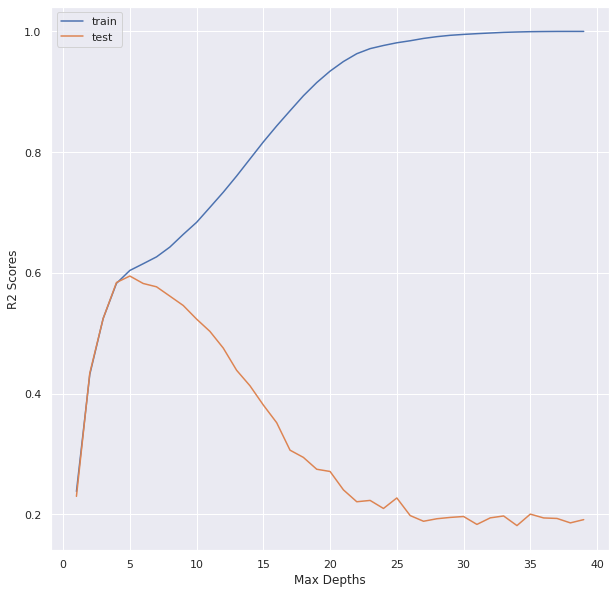

In [36]:
plt.plot(depths, scores['Train'], label = 'train')
plt.plot(depths, scores['Test'], label = 'test')
plt.ylabel('R2 Scores')
plt.xlabel('Max Depths')
plt.legend()
plt.show()

In [37]:
best_depth = scores.sort_values(by='Test', ascending=False).index[0]
best_depth

5

In [38]:
best_tree = DecisionTreeRegressor(random_state = 42, max_depth=best_depth)

best_tree_pipe = make_pipeline(preprocessor, best_tree)

best_tree_pipe.fit(X_train, y_train)

model_metrics(best_tree_pipe, X_train, y_train, X_test, y_test, model_name='Decision Regression Model')

Decision Regression Model Train Scores
MAE: 762.6102 
MSE: 1,172,122.7729 
RMSE: 1,082.6462 
R2: 0.6039

Decision Regression Model Test Scores
MAE: 738.3173 
MSE: 1,118,185.9731 
RMSE: 1,057.4431 
R2: 0.5947



In [39]:
train_score = dec_pipe.score(X_train, y_train)
test_score = dec_pipe.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.1928442252225998


#Overall, which model do you recommend?
I would recommend using the decision regression tree. It has a low bias and variance and the testing dta is higher. This is done through tuning.

I added these to make the visualization make since to me.

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

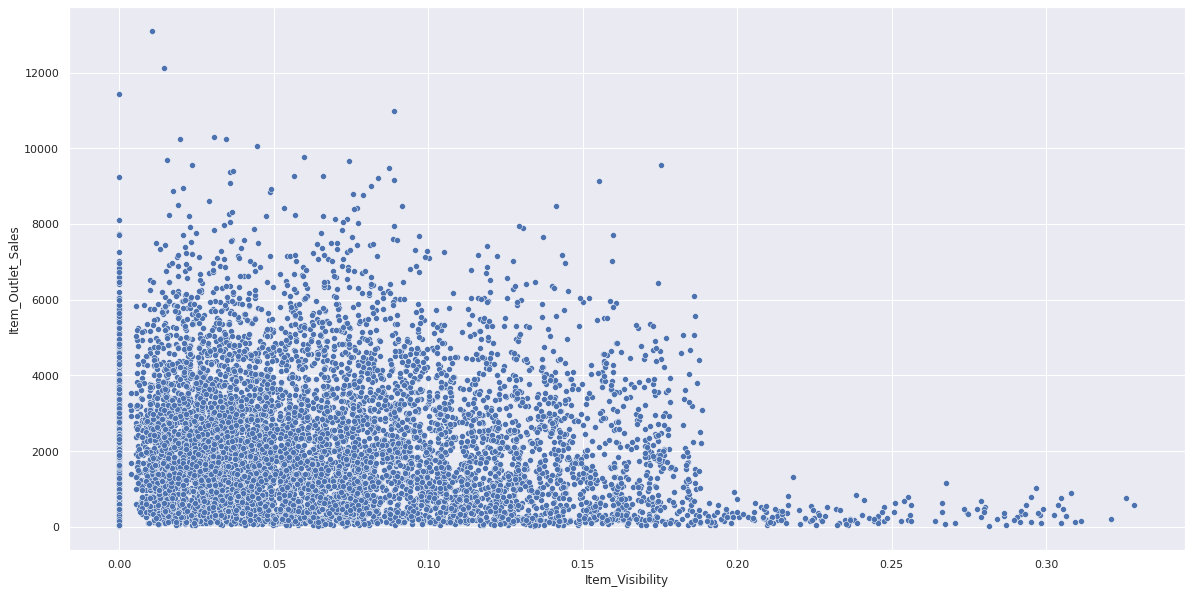

In [40]:
fig, axes = plt.subplots(ncols=1, figsize=(20,10))
sns.scatterplot(data=Sales_P, x='Item_Visibility', y= 'Item_Outlet_Sales')

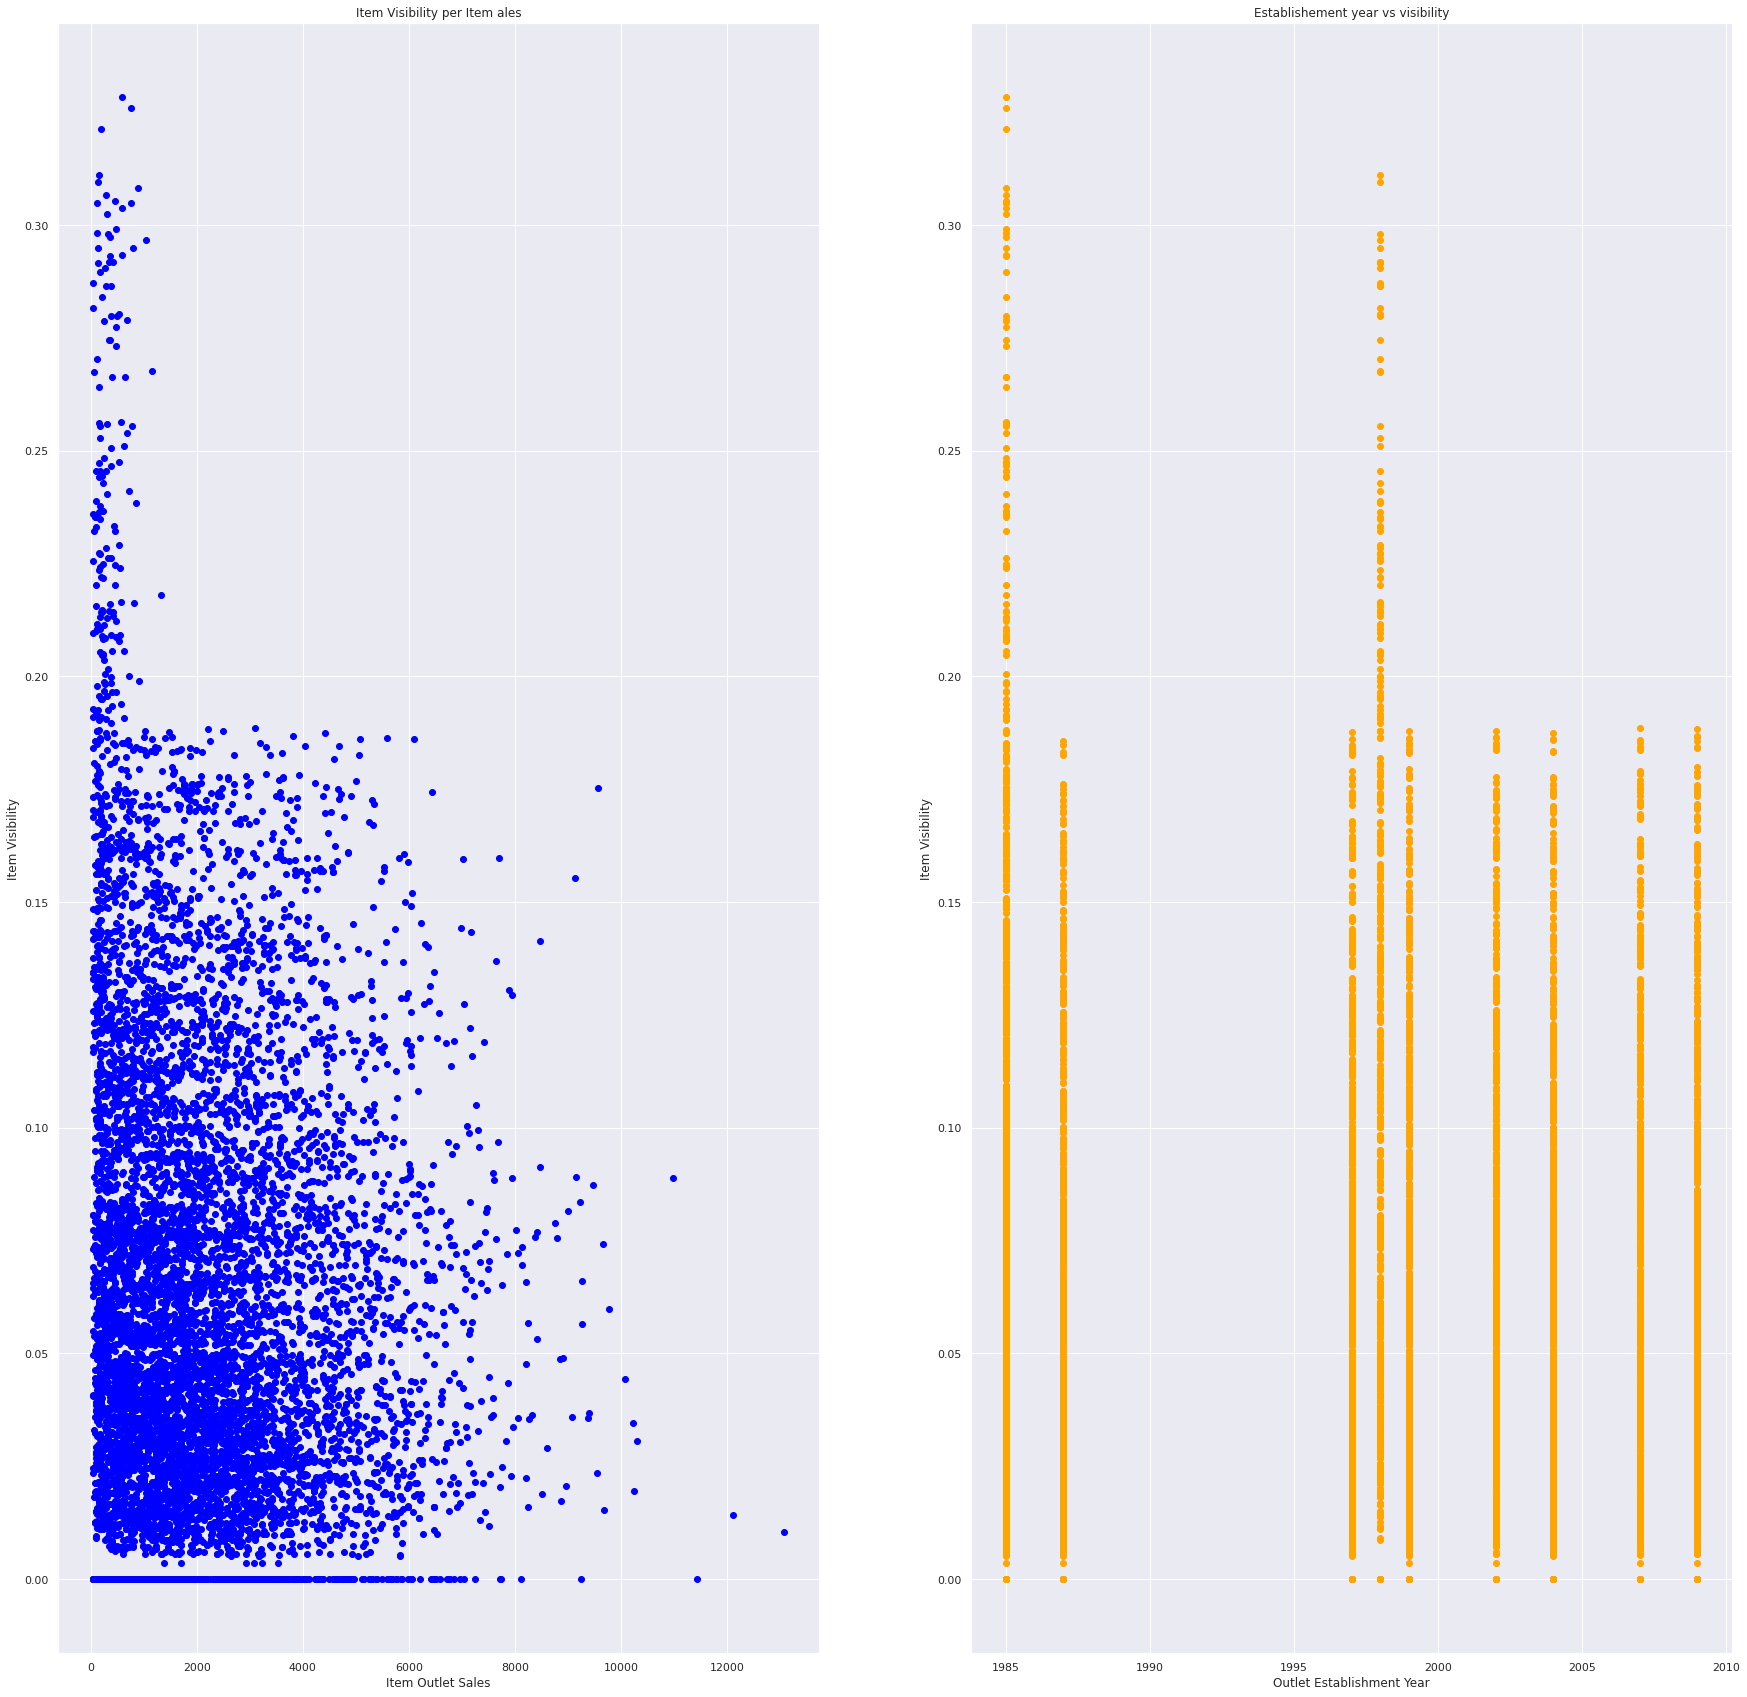

In [41]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (30,30))
# Subplot 1 
axes[0].scatter(Sales_P['Item_Outlet_Sales'], Sales_P['Item_Visibility'], color = 'blue')
axes[0].set_title('Item Visibility per Item ales', fontsize = 12)
axes[0].set_ylabel("Item Visibility")
axes[0].set_xlabel("Item Outlet Sales")
# Subplot 2
axes[1].scatter(Sales_P['Outlet_Establishment_Year'], Sales_P['Item_Visibility'], color = 'orange')
axes[1].set_title('Establishement year vs visibility', fontsize = 12)
axes[1].set_ylabel("Item Visibility")
axes[1].set_xlabel("Outlet Establishment Year");